# CIFAR Classification

### Exercise objectives

- Implement a CNN for a 10-class classification problem
- Enhance the CNN performance with data augmentation techniques
- Experiment the acceleration of GPU for image processing (Google Colab)

<hr>
<hr>

You should now have a better feeling of how a CNN is working, and especially how the convolutions are affecting the image to detect specific features. Therefore, let's now play with a bit more complex images. 

The CIFAR-10 dataset is a dataset that contains images of 10 different classes 

<img src="https://people.minesparis.psl.eu/fabien.moutarde/ES_MachineLearning/mini-projets/cifar10_notebook_fichiers/cifar_10.png">

This dataset is emblematic in the research community as many enhancements for image problems have been achieved on this dataset, and later on the CIFAR-100 dataset once the performance got too high. You can check the [wikipedia](https://en.wikipedia.org/wiki/CIFAR-10) page of the dataset if you want to know more about it.

In this notebook, we propose to implement a CNN to distinguish the 10 categories from the CIFAR-10 dataset. Again, remember that until 10 years ago, this problem was very challenging to the entire research community and is now for you to tackle.


## 0. Colab

**First, make sure to use GPU acceleration** by clicking on `"Runtime --> Change runtime --> GPU"` if you are on Colab. 

## 1. Data

We'll take care of data loading and preprocessing for you. Just run the following cells and make sure you understand them

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
import tensorflow as tf 
#importer la base de donnée
from tensorflow.keras.datasets import cifar10
#pour le model
from tensorflow.keras.models import Sequential
#pour les couches
from tensorflow.keras.layers import Dense, Activation, Flatten
#partie reseau convolutionnelle
from tensorflow.keras.layers import Conv2D,MaxPooling2D 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
df = cifar10.load_data()
(X_train, y_train),(X_test,y_test) = df
print("X_train :", X_train.shape,"X_test :", X_test.shape, "y_train :", y_train.shape, "y_test :" ,y_test.shape)

X_train : (50000, 32, 32, 3) X_test : (10000, 32, 32, 3) y_train : (50000, 1) y_test : (10000, 1)


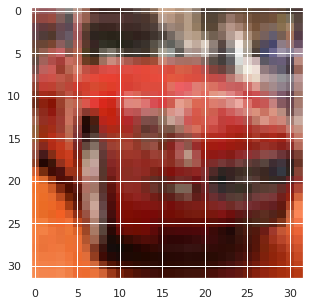

In [ ]:
#Pour visualiser les photos 
plt.imshow(X_train[5])
#print(y_train[10])

In [ ]:
# etape1- Couche de convolution :conv2d (Conv2D)             (None, 30, 30, 256)       7168
# etape2- Couche d'activation :activation (Activation)     (None, 30, 30, 256)       0 
# etape3- max_pooling2d (MaxPooling2D  (None, 15, 15, 256)      0         
# etape4- flatten (Flatten)           (None, 57600)             0   
#Premiere couche cache :dense (Dense)               (None, 64)                3686464   
#couche de sorie :dense_1 (Dense)             (None, 10)                650 
#En fin fonction d'activation :     activation_1 (Activation)   (None, 10)                0   

In [ ]:
type(models)

keras.engine.sequential.Sequential

In [14]:
from tensorflow.keras.datasets import cifar10
import numpy as np

(images_train, labels_train), (images_test, labels_test) = cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(images_train.shape, images_test.shape)
unique, counts = np.unique(labels_train, return_counts=True)
dict(zip(unique, counts))

(50000, 32, 32, 3) (10000, 32, 32, 3)


{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

❗️ 50,000 images may take a long time to train: **Always start with a subsample to iterate quickly** before scaling up

Below, we divide the dataset size by `reduction_factor=10`. Don't try to increase it unless we ask you too.

In [15]:
# Reduce size
reduction_factor = 10

idx_train =  np.random.choice(len(images_train), round(len(images_train)/reduction_factor))
idx_test =  np.random.choice(len(images_test), round(len(images_test)/reduction_factor))

images_train_small = images_train[idx_train]
images_test_small = images_test[idx_test]
labels_train_small = labels_train[idx_train]
labels_test_small = labels_test[idx_test]

print(images_train.shape, images_test.shape)
unique, counts = np.unique(labels_train_small, return_counts=True)
dict(zip(unique, counts))

(50000, 32, 32, 3) (10000, 32, 32, 3)


{0: 477,
 1: 487,
 2: 488,
 3: 476,
 4: 515,
 5: 509,
 6: 503,
 7: 506,
 8: 519,
 9: 520}

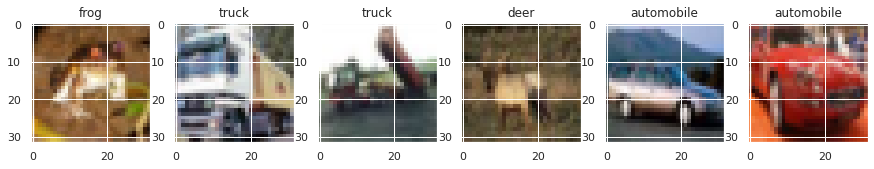

In [ ]:
# Let's plot few images to see what they look like
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
for i in range(6):
    plt.subplot(1,6, i+1)
    img = images_train[i]
    label = labels_train[i][0]
    plt.imshow(img)
    plt.title(labels[label])

And, as usual,
- we normalize the data between 0 and 1
- we create `y` as one-hot-encoded version of `labels`

In [16]:
X_train = images_train / 255.
X_train_small = images_train_small / 255.
X_test = images_test / 255.
X_test_small = images_test_small / 255.
#print("X_train ", X_train)
#print("X_train_small ",X_train_small)
#print("X_test ",X_test)
#print("X_test_small ",X_test_small)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(labels_train, 10)
y_train_small = to_categorical(labels_train_small, 10)
y_test = to_categorical(labels_test, 10)
y_test_small = to_categorical(labels_test_small, 10)
#print("y_train ", y_train)
#print("y_train_small ",y_train_small)
#print("y_test ", y_test)
#print("y_test_small ", y_test_small)

In [17]:
#Il faut normaliser les photos les chiffre entre [0, 1]: car les données sont sous forma de matrice 
X_train = X_train/255.0
X_test  = X_test/255.0

In [18]:
#le nbre des images:50000
#la taille image: 32, 32
#code couleur:3
print(X_train.shape)
print(X_train.shape[1:])

(50000, 32, 32, 3)
(32, 32, 3)


## 2. Iterate on your CNN architecture using your small training set


❓ **Question** ❓ Your turn to shine!

- Define the CNN architecture of your choice in a method `initialize_model()`
- Compile your model in a method `compile_model()`:
- Fit it on your **small** training set **only**
- Store the output of the fit in an `history` variable
- Try a first model yourself, before looking at PRO TIPS below
 
<details>
    <summary> 🆘 PRO TIPS 🆘  </summary>


- Do not forget to add the input shape of your data to the first layer: it has 3 colors
- Start simple, complexify after few trials to get better results
- The task is complex: Try at least 3 or 4 convolutions
- Kernel size do not need to be large for such small picture resolution!
- Add some Maxpooling (but not too much else the activation "image" will become too small)
- Keep padding = 'same' and 'stride' = (1,1) to start with.
- Once your model overfits, try adding some dropout layer to regularize the network. A good tip is too increase dropout strengh as you move closer to the output, so as not to overfit on your end-result
- Images are so small, that you can use larger batch size (32 or 64) to benefit from even more GPU parallelization
</details>


In [ ]:
#Creation du modele: Creer la photo
#model = Sequential()
def initialize_model():
  #Initialiser le model
  model = Sequential()
  #creer le reseau de neurone convolutionnel
  #1couche de convolution: Conv2D(256:nbre de filtre, taille de filtre(3,3))
  model.add(Conv2D(25, (3,3), input_shape = X_train.shape[1:]))
  #rajouter une fonction d'activation
  model.add(Activation('relu'))
  #creer la convolution ; spacifier la taille du pool(partie maximale):pool_size=(2,2)
  model.add(MaxPooling2D(pool_size=(2,2)))
  #partie flatting: mettre sous forme d'une seule ligne(aligne la df) ou colonne
  #Laisse vider pour permettre au reseau de premdre forme soit meme
  model.add(Flatten())
  #Comportement connecte : rejoute un reseau de neuronne normal comme cas de Exercice2 botton housing)
  #On a mis une couche de 64 noeuds
  model.add(Dense(64))
  #couche pour la sortie : savoir combien de noeuds= les types dans la data set
  model.add(Dense(10))
  #En fin la fonction d'activation
  model.add(Activation('sigmoid'))
 
  #Synthese du model
  model.summary() 
  return model
models = inicialization()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 256)       7168      
                                                                 
 activation_2 (Activation)   (None, 30, 30, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 256)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                3686464   
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                      

In [23]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
'''instanciate and return the CNN architecture of your choice with less than 150,000 params'''
def initialize_model():
  #Partie B Reseau de neurones
  modele = Sequential()
  #Deuxieme couche de convolution 16 neurones
  modele.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
  modele.add(Conv2D(16, kernel_size=3, padding= 'same', activation='relu'))
  modele.add(MaxPooling2D(pool_size=(2,2)))
  #Premier couche de convolution: 32 neurones(nbre de filtre), convolution 3*3(precise la taille du conv), activation 
  modele.add(Conv2D(32, kernel_size=3, padding= 'same', activation='relu'))
  modele.add(Conv2D(32, kernel_size=3, padding= 'same', activation='relu'))
  modele.add(MaxPooling2D(pool_size=(2,2)))
  #Aplatissage
  modele.add(Flatten())
  #couche de sortie : 10 neurones
  modele.add(Dense(32, activation='relu'))
  modele.add(Dense(64, activation='relu'))
  modele.add(Dense(10, activation='softmax'))
  #descente de gradiant: type d'erreur "loss" , methede de gradiant tre efficace "adam"
  modele.compile(optimizer= 'adam',loss='categorical_crossentrepy', metrics=['categorical_crossentropy'])
  
  modele.build(input_shape = (None, 32, 32, 3))
  #Synthese du model
  modele.summary() 
  return modele

modele = initialize_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                  

In [22]:
 '''return a compiled model suited for the cifar tasks'''
#fonction de perte ou precision(CAS CNN) : on a plusieurs cathegories('sparse_categarical)
#Gerer les poids: optimizer
#Gerer la precision
def compile_model(modele):
  modele.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return modele
compile_model(modele)

In [20]:
type(modele)

keras.engine.sequential.Sequential

In [23]:
#Entrainement du model ou reseau
def entrainement():
  #Vue que la taille de la df est grande : batch_size
  #On peut mettre :epoch = 10 pour ameliorer le model
  hystory = modele.fit(X_train_small, y_train_small, batch_size=64, validation_split=0.3, epochs = 10)
  return modele, hystory
entrainement()

Epoch 1/10
55/55 [==============================] - 10s 165ms/step - loss: 2.2060 - accuracy: 0.1689 - val_loss: 2.1315 - val_accuracy: 0.1967
Epoch 2/10
55/55 [==============================] - 9s 163ms/step - loss: 1.9867 - accuracy: 0.2497 - val_loss: 1.9441 - val_accuracy: 0.2907
Epoch 3/10
55/55 [==============================] - 9s 160ms/step - loss: 1.8087 - accuracy: 0.3500 - val_loss: 1.8171 - val_accuracy: 0.3340
Epoch 4/10
55/55 [==============================] - 9s 157ms/step - loss: 1.6836 - accuracy: 0.3923 - val_loss: 1.6812 - val_accuracy: 0.3893
Epoch 5/10
55/55 [==============================] - 9s 160ms/step - loss: 1.5840 - accuracy: 0.4246 - val_loss: 1.6376 - val_accuracy: 0.4027
Epoch 6/10
55/55 [==============================] - 11s 207ms/step - loss: 1.4715 - accuracy: 0.4591 - val_loss: 1.5864 - val_accuracy: 0.4200
Epoch 7/10
55/55 [==============================] - 9s 162ms/step - loss: 1.3958 - accuracy: 0.4846 - val_loss: 1.5165 - val_accuracy: 0.4553
Epoc

(<keras.engine.sequential.Sequential at 0x7fd0f4a5e810>,
 <keras.callbacks.History at 0x7fd0f4b01e50>)

In [24]:
 hystory = modele.fit(X_train_small, y_train_small, batch_size=64, validation_split=0.3, epochs = 50)

Epoch 1/50
55/55 [==============================] - 10s 173ms/step - loss: 1.2061 - accuracy: 0.5697 - val_loss: 1.5333 - val_accuracy: 0.4673
Epoch 2/50
55/55 [==============================] - 9s 170ms/step - loss: 1.1057 - accuracy: 0.6071 - val_loss: 1.4937 - val_accuracy: 0.4907
Epoch 3/50
55/55 [==============================] - 9s 169ms/step - loss: 1.0393 - accuracy: 0.6340 - val_loss: 1.5174 - val_accuracy: 0.4747
Epoch 4/50
55/55 [==============================] - 9s 169ms/step - loss: 0.9899 - accuracy: 0.6477 - val_loss: 1.5214 - val_accuracy: 0.4833
Epoch 5/50
55/55 [==============================] - 9s 169ms/step - loss: 0.9333 - accuracy: 0.6663 - val_loss: 1.5133 - val_accuracy: 0.4913
Epoch 6/50
55/55 [==============================] - 9s 168ms/step - loss: 0.8690 - accuracy: 0.6943 - val_loss: 1.5368 - val_accuracy: 0.4960
Epoch 7/50
55/55 [==============================] - 9s 169ms/step - loss: 0.8066 - accuracy: 0.7086 - val_loss: 1.6459 - val_accuracy: 0.4867
Epoch

In [25]:
score = modele.evaluate(X_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 5.992846488952637
Test accuracy 0.10000000149011612


In [26]:
modele.predict(X_test, verbose=1)

313/313 [==============================] - 7s 22ms/step


array([[2.59509850e-02, 5.62148576e-04, 5.48446119e-01, ...,
        1.87339276e-04, 1.17858435e-04, 5.88140620e-06],
       [2.57239044e-02, 5.57588413e-04, 5.66531539e-01, ...,
        1.77062961e-04, 1.29080814e-04, 6.47047682e-06],
       [2.61516776e-02, 5.56214887e-04, 5.58199942e-01, ...,
        1.74536079e-04, 1.23648744e-04, 6.02993850e-06],
       ...,
       [2.50396263e-02, 5.75810729e-04, 5.49346864e-01, ...,
        1.84879464e-04, 1.14422539e-04, 5.90455329e-06],
       [2.65966132e-02, 5.83055022e-04, 5.46825290e-01, ...,
        1.69389430e-04, 1.13477523e-04, 5.99168698e-06],
       [2.55722851e-02, 5.68238262e-04, 5.39636433e-01, ...,
        1.97560570e-04, 1.21509700e-04, 5.87047907e-06]], dtype=float32)

❓ **Question** ❓ Run the following function on the previous history (keep the default arguments, these are intended for future plots in the notebook).

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd0f1193f10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd0f1225d90>)

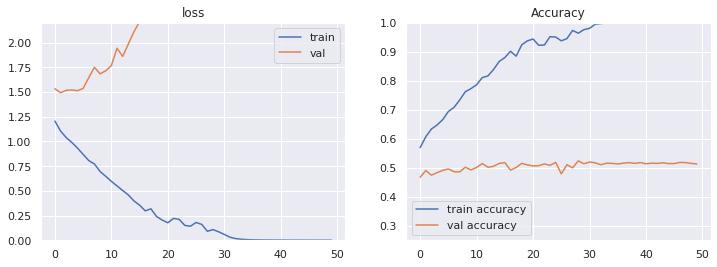

In [27]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

plot_history(hystory, title='', axs=None, exp_name="")    

❓ **Question** ❓ Evaluate your model on the test data and compare it with baseline. Are you satisfied with these performances ? Look at PRO TIPS above and iterate a bit if you want to improve!

## 3. Increase data size

❓ **Question** ❓ Now that your model fits on a small subsample, try to fit it on the full dataset and notice how performance increases. 

🚨 **Make sure to use GPU acceleration** by clicking on `"Runtime --> Change runtime --> GPU"` if you are on Colab. 

💡 Training neural network on images (in each batch) can be parallelized, and this parallelization procedure can be done on GPU.


In [ ]:
# YOUR CODE HERE

## 4. Data augmentation

☝️ It seems that adding pictures greatly improves model performance! Welcome to the Deep Learning paradigm, where big data does make a difference.

To easily improve the accuracy of a model without much work, we can generate new data: the _data augmentation_. This widely used technique consists in applying little transformation to input images without changing its label, as mirroring, cropping, intensity changes, etc. The improved performance simply results from the Neural network training with more different data.

The natural way to generate these new images is to apply some transformations and train the model on the original and new images. However, such procedure requires to keep all these images in memory : it can be very intensive, to the point that your computer memory cannot hold any new image (your computer might even crash).

For this reason, we will augment the data **on the fly** (batch per batch), meaning that we will create new data, use them to fit the model, then delete them. Here, Keras is our friend as it provides the utils to do all this job for us. Look at the following code : the general writing can seem odd but don't be panicked: just look at the function arguments that defines the augmentation techniques that we will use and that you can check in the  [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=(0.8, 1.2),
    ) 

datagen.fit(X_train)
datagen

In [29]:
X_augmented_iterator = datagen.flow(X_train, shuffle=False, batch_size=1)
X_augmented_iterator

💡 Always visualize your data augmentation in order to double check that you can still recognize the label yourself!

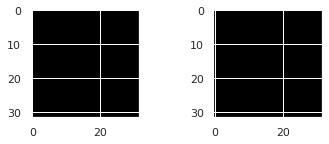

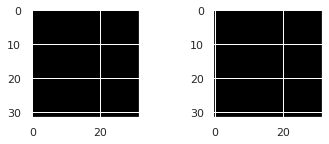

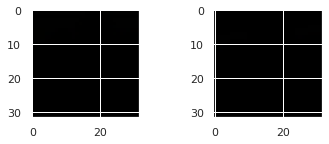

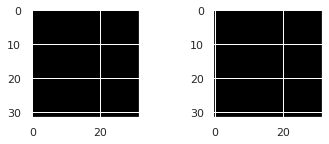

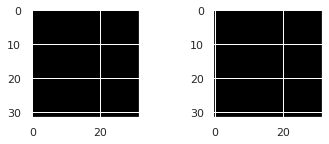

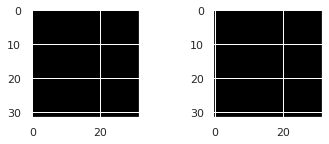

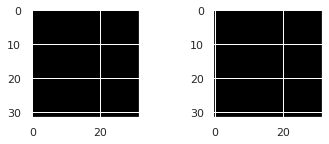

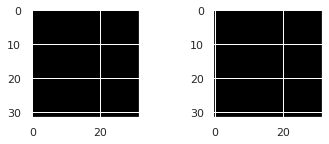

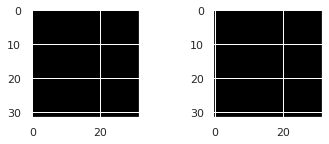

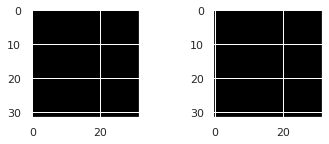

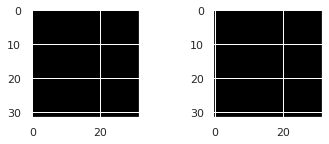

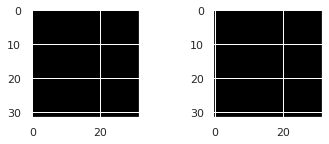

In [30]:
import numpy as np

for i, (raw_image, augmented_image) in enumerate(zip(X_train, X_augmented_iterator)):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
    ax1.imshow(raw_image)
    ax2.imshow(augmented_image[0])
    plt.show()
    
    if i > 10:
        break

❗ **Remark** ❗ In this example, there is one augmented image per initial image. In fact, when your model will use `datagen.flow` in the `fit`, it will create one augmentation per epochs! Indeed, the images in the original dataset will not be provided to the optimizer, only augmented ones instead. (But because the augmentations are performed randomly, this allows both modified images and some very close of the originals).

❓ **Question** ❓ Take time to understand the cell below: Previously, we used the `validation_split` argument to let the model separate a training set from the validation one. It is not possible here as **using an image in the training set and its transformation in the validation set is considered as a data leakage**. Therefore, we have to manually define the `validation_data` with the following commands:


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# The model
model_aug = initialize_model()
model_aug = compile_model(model_aug)

# The data generator
X_tr = X_train[:40000]
y_tr = y_train[:40000]
X_val = X_train[40000:]
y_val = y_train[40000:]
train_flow = datagen.flow(X_tr, y_tr, batch_size=64)

# The early stopping criterion
es = EarlyStopping(patience=3)

# The fit
history_aug = model_aug.fit(train_flow, 
                        epochs=50, 
                        callbacks=[es], 
                        validation_data=(X_val, y_val))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                  

❗️❗️ Remark ❗️❗️: The training can be quite long here. Don't hesitate to go to the next exercise and gome back once in a while to finish the last questions

❓ **Question** ❓ Now, let's plot the previous and current run histories. What do you think of the data augmentation?


In [ ]:
# YOUR CODE HERE

💡 Data augmentation may not improve your performance easily. It strongly depends on the model architecture you used, the learning rate, the type of augmentation chosen, etc...Image classification is an art that takes lots of practice to master!

🚨 **Don't spend too much time now trying to finetune your model - you have other interesting challenge ahead**. 

📚 [here is a good example of solution for future reference](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/). They manage to get about 80% accuracy

### 🏁 Congratulation 🏁 
